In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [10]:
df = pd.read_csv('Salary_Data.csv')

In [11]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [13]:
df.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000014D5A5F4C48>,
      dtype=object)

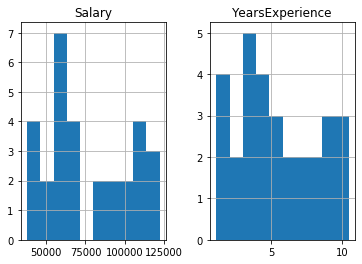

In [14]:
df.hist()

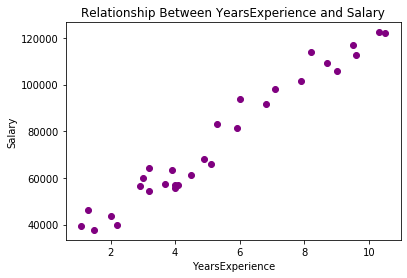

In [15]:
plt.scatter(df.YearsExperience, df.Salary, color='purple')
plt.xlabel('YearsExperience')
plt.ylabel('Salary')
plt.title("Relationship Between YearsExperience and Salary")
plt.show()

In [16]:
x = df.iloc[:, :-1].values
y = df.iloc[:, 1].values

In [17]:
x


array([[ 1.1],
       [ 1.3],
       [ 1.5],
       [ 2. ],
       [ 2.2],
       [ 2.9],
       [ 3. ],
       [ 3.2],
       [ 3.2],
       [ 3.7],
       [ 3.9],
       [ 4. ],
       [ 4. ],
       [ 4.1],
       [ 4.5],
       [ 4.9],
       [ 5.1],
       [ 5.3],
       [ 5.9],
       [ 6. ],
       [ 6.8],
       [ 7.1],
       [ 7.9],
       [ 8.2],
       [ 8.7],
       [ 9. ],
       [ 9.5],
       [ 9.6],
       [10.3],
       [10.5]])

In [18]:
y

array([ 39343,  46205,  37731,  43525,  39891,  56642,  60150,  54445,
        64445,  57189,  63218,  55794,  56957,  57081,  61111,  67938,
        66029,  83088,  81363,  93940,  91738,  98273, 101302, 113812,
       109431, 105582, 116969, 112635, 122391, 121872], dtype=int64)

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=0)

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [21]:
y_test

array([ 37731, 122391,  57081,  63218, 116969, 109431, 112635,  55794,
        83088], dtype=int64)

In [22]:
print('coefficient = ', reg.coef_)
print('intercept = ', reg.intercept_)
y_pred = reg.predict(X_test)
print(y_pred)


coefficient =  [9360.26128619]
intercept =  26777.391341197632
[ 40817.78327049 123188.08258899  65154.46261459  63282.41035735
 115699.87356004 108211.66453108 116635.89968866  64218.43648597
  76386.77615802]


In [24]:
y_pred = reg.predict(X_test)

In [25]:
y_pred


array([ 40817.78327049, 123188.08258899,  65154.46261459,  63282.41035735,
       115699.87356004, 108211.66453108, 116635.89968866,  64218.43648597,
        76386.77615802])

In [26]:
dc = pd.DataFrame(y_test, y_pred)
dc

,0
40817.783270,37731
123188.082589,122391
65154.462615,57081
63282.410357,63218
115699.873560,116969
108211.664531,109431
116635.899689,112635
64218.436486,55794
76386.776158,83088


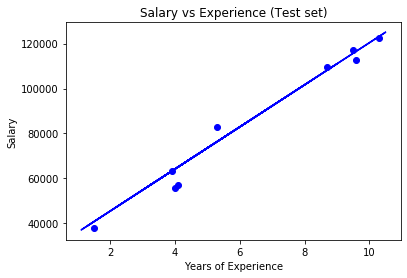

In [27]:
plt.scatter(X_test, y_test, color = 'blue')
plt.plot(X_train, reg.predict(X_train), color = 'blue')
plt.title('Salary vs Experience (Test set)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.show()

In [28]:
reg.predict([[6]])

array([82938.95905836])

In [29]:
from sklearn.metrics import r2_score #works
acc = r2_score(y_test, y_pred)
print(acc)

0.9740993407213511
